<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import os
import sys

In [2]:
desktop_path = '/Users/rt/Desktop'
path = '/Users/rt/Desktop/College/4th year/sem 7/Project/Literature survey/Dicom/dicom/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm'

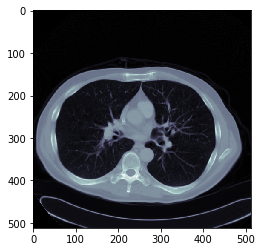

In [3]:
ds = pydicom.dcmread(path)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()

In [4]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088


Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: TCGA-17-Z034, 
Patient id.......: TCGA-17-Z034
Modality.........: CT
Study Date.......: 19830708
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [007.812500e-01, 007.812500e-01]
Slice location...: -247.5


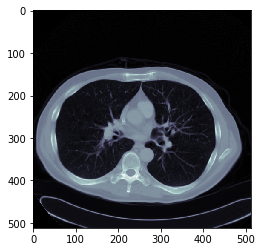

In [5]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

dataset = pydicom.dcmread(path)

# Normal mode:
print()
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [6]:
img = ds.pixel_array

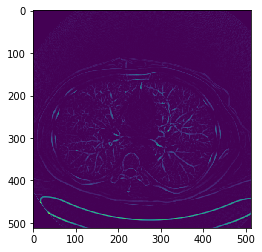

True

In [7]:
k1 = np.ones((5,5),np.uint8)
tophat1 = cv.morphologyEx(img, cv.MORPH_TOPHAT, k1)
plt.imshow(tophat1)
plt.show()
cv.imwrite(desktop_path + 'tophatk1.jpeg', tophat1)

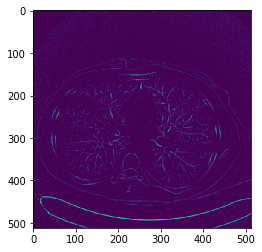

In [9]:
k2 = np.array([[0, 0, 1, 0, 0],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [0, 0, 1, 0, 0]], dtype=np.uint8)
tophat2 = cv.morphologyEx(img, cv.MORPH_TOPHAT, k2)
plt.imshow(tophat2)

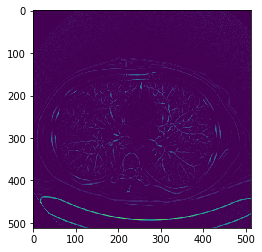

In [10]:
k3 = np.array([[0, 0, 1, 0, 0],
               [0, 0, 1, 0, 0],
               [1, 1, 1, 1, 1],
               [0, 0, 1, 0, 0],
               [0, 0, 1, 0, 0]], dtype=np.uint8)
tophat3 = cv.morphologyEx(img, cv.MORPH_TOPHAT, k3)
plt.imshow(tophat3)

In [16]:
blur = cv.blur(img, (3, 3))
ret, thresh = cv.threshold(blur, 50, 255, cv.THRESH_BINARY)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


True

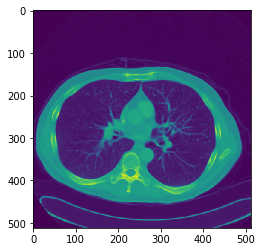

In [19]:
from pydicom.data import get_testdata_file
ds = pydicom.dcmread(path)
#plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
#plt.show()
d1 = ds.pixel_array
print(d1)
plt.imshow(d1)
cv.imwrite("image1.jpg",d1)

255


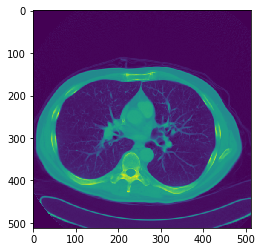

In [20]:
i1 = ds.pixel_array
#plt.imshow(i1)
t1 = np.double(i1)
out = np.zeros(t1.shape, np.double)
normalized = cv.normalize(t1, out, 1.0, 0.0, cv.NORM_MINMAX)
normalized = normalized * 255
normalized = np.uint8(normalized)
plt.imshow(normalized)
cv.imwrite('normalized.jpg',normalized)
print(np.amax(normalized))

In [21]:
print(np.amax(i1))
np.shape(i1)

1918


(512, 512)

In [22]:
src = normalized
blur = cv.blur(src, (3, 3))
ret, thresh = cv.threshold(blur, 50, 255, cv.THRESH_BINARY)

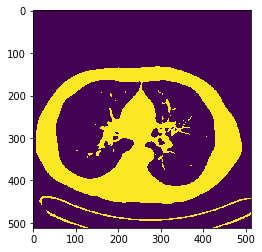

In [23]:
plt.imshow(thresh)

In [24]:
rt = ds.pixel_array

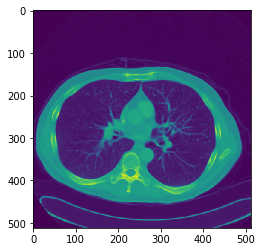

In [25]:
plt.imshow(rt)
src1 = rt
blur1 = cv.blur(src1, (3, 3))
ret1, thresh1 = cv.threshold(blur1, 50, 255, cv.THRESH_BINARY)

0


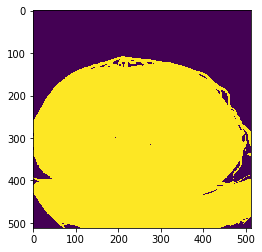

In [26]:
plt.imshow(thresh1)
print(np.amin(thresh1))

In [27]:
#import libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import os
import sys

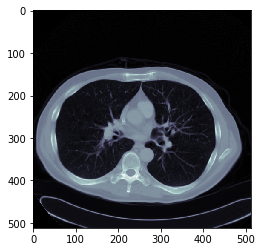

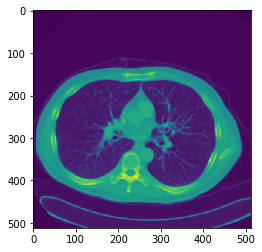

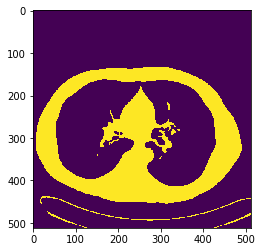

In [32]:
#loading dicom image
from pydicom.data import get_testdata_file
ds = pydicom.dcmread(path)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()

#storing pixel values into a list
dcm_input = ds.pixel_array
gray = cv.normalize(dcm_input, dcm_input, 0, 255, cv.NORM_MINMAX)
gray = np.uint8(gray)

gray_GaussianBlur = cv.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray_GaussianBlur)
plt.show()

#thresholding using Otsu's method
blur = cv.GaussianBlur(gray,(5,5),0)
ret,gray_thresholded = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(gray_thresholded)
plt.show()

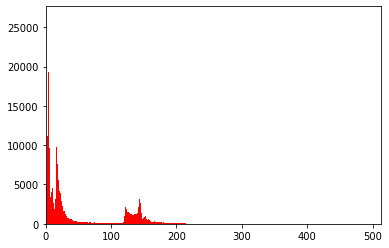

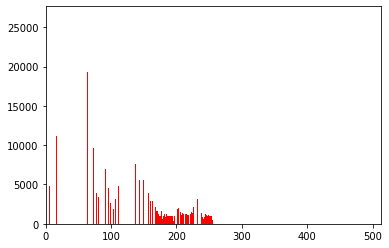

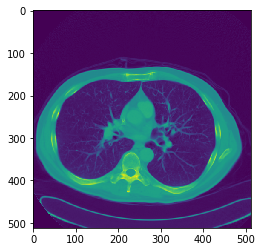

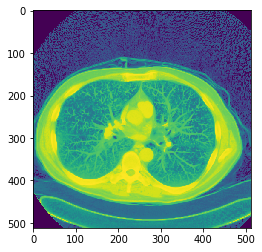

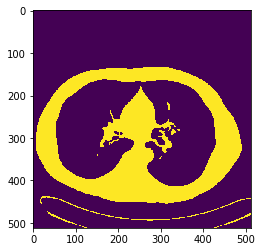

In [33]:
#Histogram Equalization

#Histogram before equalization
hist,bins = np.histogram(gray.flatten(),512,[0,512])
plt.hist(gray.flatten(),512,[0,512], color = 'r')
plt.xlim([0,512])
plt.show()

#histogram after equalization
gray_equalized = cv.equalizeHist(gray)
hist,bins = np.histogram(gray_equalized.flatten(),512,[0,512])
plt.hist(gray_equalized.flatten(),512,[0,512], color = 'r')
plt.xlim([0,512])
plt.show()

#image before equalization
plt.imshow(gray)
plt.show()

#image after equalization
plt.imshow(gray_equalized)
plt.show()

#--------------------------#
#equalization using thresholded image
gray_equalized1 = cv.equalizeHist(gray_thresholded)
plt.imshow(gray_equalized1)

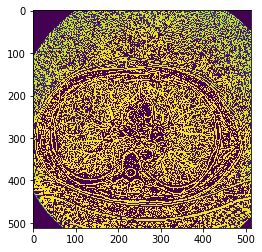

In [34]:
#LoG Filter
#kernel = 3
ddepth = cv.CV_16S
kernel_size = 3

t1 = cv.GaussianBlur(gray_equalized,(1,1), 0);
t2 = cv.GaussianBlur(gray_equalized,(5,5), 0);
t3 = t2-t1
plt.imshow(t3)

In [35]:
gray_max = np.amax(gray)
print(gray_max)
gray_min = np.amin(gray)
print(gray_min)
gray_range = gray_max - gray_min
print(gray_range)
slices = gray_range/6
print(slices)

255
0
255
42.5


42
85
127
170
212
255


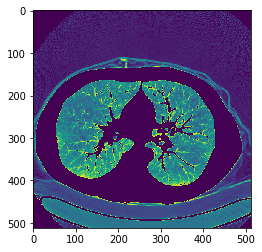

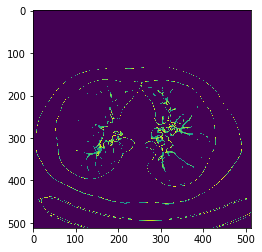

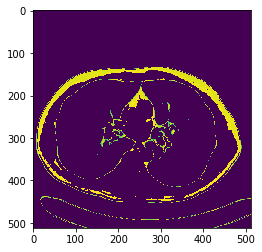

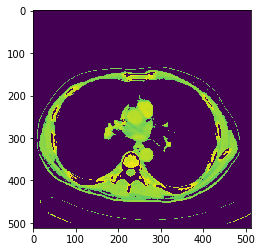

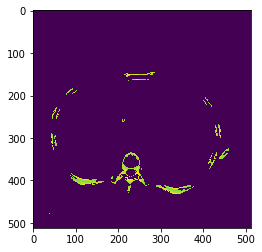

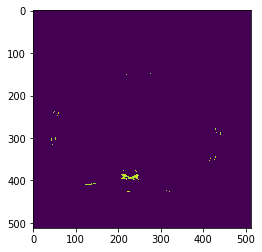

In [36]:
gray_slice1 = np.zeros([512,512],dtype = np.uint16)
gray_slice2 = np.zeros([512,512],dtype = np.uint16)
gray_slice3 = np.zeros([512,512],dtype = np.uint16)
gray_slice4 = np.zeros([512,512],dtype = np.uint16)
gray_slice5 = np.zeros([512,512],dtype = np.uint16)
gray_slice6 = np.zeros([512,512],dtype = np.uint16)

for i in range(0,512):
    for j in range(0,512):
        if gray[i][j] <= slices:
            gray_slice1[i][j] = gray[i][j]
        elif gray[i][j] <= 2*slices:
            gray_slice2[i][j] = gray[i][j]
        elif gray[i][j] <= 3*slices:
            gray_slice3[i][j] = gray[i][j]
        elif gray[i][j] <= 4*slices:
            gray_slice4[i][j] = gray[i][j]
        elif gray[i][j] <= 5*slices:
            gray_slice5[i][j] = gray[i][j]
        else:
            gray_slice6[i][j] = gray[i][j]
            
            
print(np.amax(gray_slice1))
print(np.amax(gray_slice2))
print(np.amax(gray_slice3))
print(np.amax(gray_slice4))
print(np.amax(gray_slice5))
print(np.amax(gray_slice6))

plt.imshow(gray_slice1)
plt.show()
plt.imshow(gray_slice2)
plt.show()
plt.imshow(gray_slice3)
plt.show()
plt.imshow(gray_slice4)
plt.show()
plt.imshow(gray_slice5)
plt.show()
plt.imshow(gray_slice6)